# Heart Disease Data Analysis and Machine learning

## Attribute Info:
    1) Age 
    2) Sex
    3) Chest Pain
    4) Resting Blood Pressure
    5) Serum Cholestrol
    6) Fasting Blood Sugar
    7) Resting electrocardiographic results
    8) Maximum heart rate achieved
    9) Exercise induced angina
    10) ST depression induced by exercise relative to rest
    11) The slope of the peak exercise ST segment
    12) Number of major vessels (0-3) 
    13) 3 = normal; 6 = fixed defect; 7 = reversable defect
    14) Target - 1 or 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


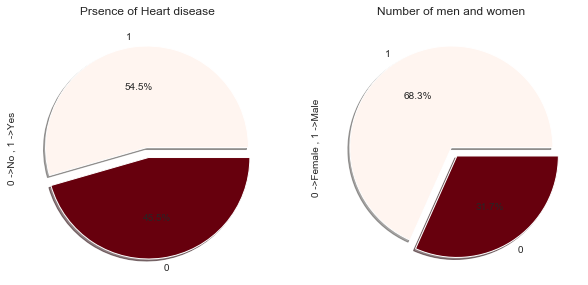

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Prsence of Heart disease')
df['target'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[0])
ax[0].set_ylabel("0 ->No , 1 ->Yes")
plt.title('Number of men and women')
df['sex'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[1])
ax[1].set_ylabel("0 ->Female , 1 ->Male");

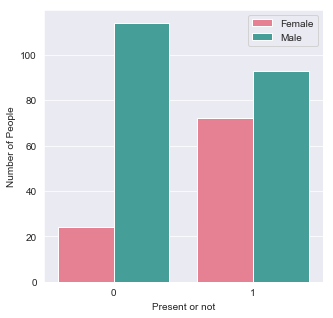

In [5]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'target',data = df,hue = 'sex',palette = 'husl')
plt.xlabel('Present or not')
plt.ylabel('Number of People')
plt.legend(['Female','Male']);

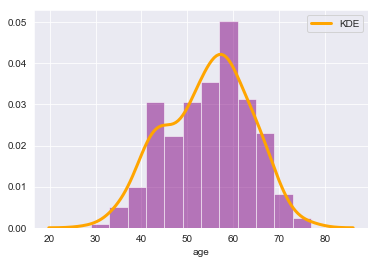

In [6]:
sns.distplot(df['age'],color='Purple',hist_kws={'alpha':0.5,'linewidth': 1}, kde_kws={'color': 'orange', 'lw': 3, 'label': 'KDE'});

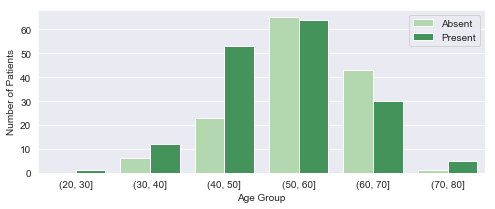

In [7]:
plt.figure(figsize = (8,3))
bins = [20,30,40,50,60,70,80]
df['age_bins']=pd.cut(df['age'], bins=bins)
g1=sns.countplot(x='age_bins',data=df ,hue='target',palette='Greens',linewidth=1)
plt.legend(['Absent','Present'])
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

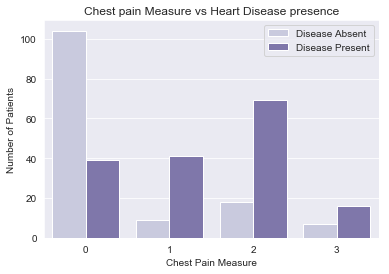

In [8]:
sns.countplot(x='cp',data=df,hue='target',palette='Purples',linewidth=1)
plt.title('Chest pain Measure vs Heart Disease presence')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Measure')
plt.legend(['Disease Absent','Disease Present']);

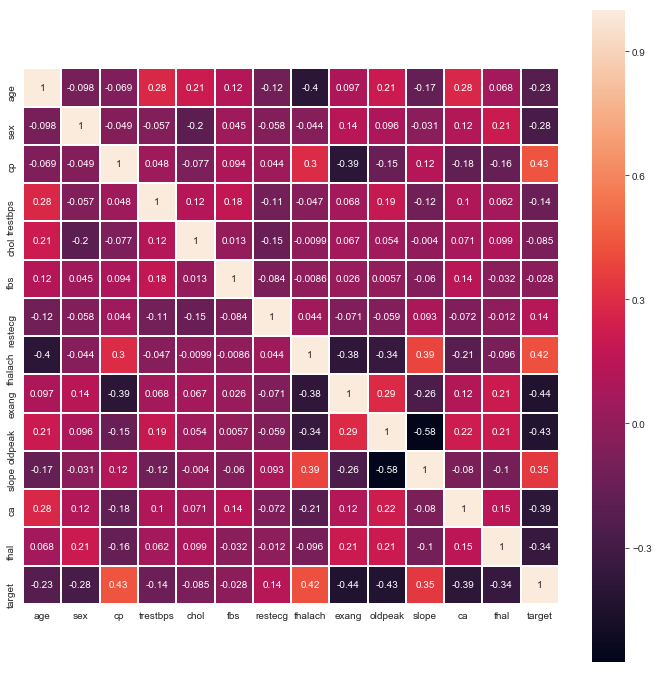

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),square = True,annot=True,linewidths=1);

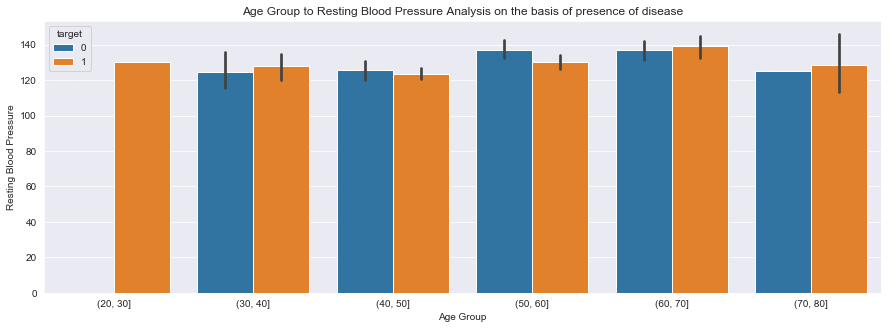

In [10]:
plt.figure(figsize = (15,5))
sns.barplot(x=df['age_bins'],y=df['trestbps'],hue = df['target'])
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure')
plt.title('Age Group to Resting Blood Pressure Analysis on the basis of presence of disease');

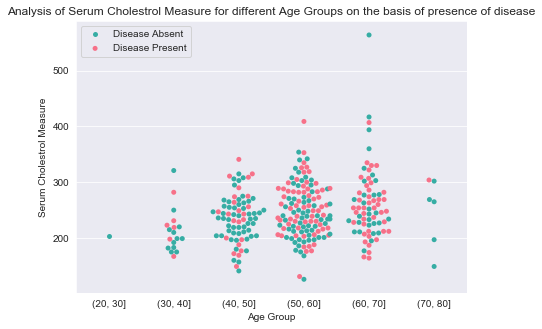

In [11]:
plt.figure(figsize = (7,5))
sns.swarmplot(x='age_bins',y= 'chol',data=df,hue='target',palette='husl')
plt.title('Analysis of Serum Cholestrol Measure for different Age Groups on the basis of presence of disease')
plt.xlabel('Age Group')
plt.ylabel('Serum Cholestrol Measure')
plt.legend(['Disease Absent','Disease Present']);

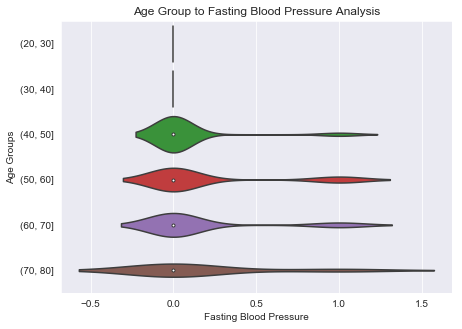

In [12]:
plt.figure(figsize = (7,5))
sns.violinplot(x=df['fbs'],y=df['age_bins'])
plt.xlabel('Fasting Blood Pressure')
plt.ylabel('Age Groups')
plt.title('Age Group to Fasting Blood Pressure Analysis');

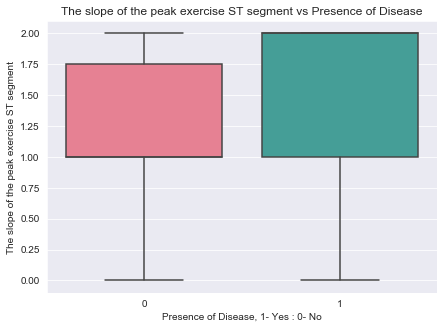

In [13]:
plt.figure(figsize = (7,5))
sns.boxplot(x='target',y= 'slope',data=df,palette='husl')
plt.title('The slope of the peak exercise ST segment vs Presence of Disease')
plt.xlabel('Presence of Disease, 1- Yes : 0- No')
plt.ylabel('The slope of the peak exercise ST segment');

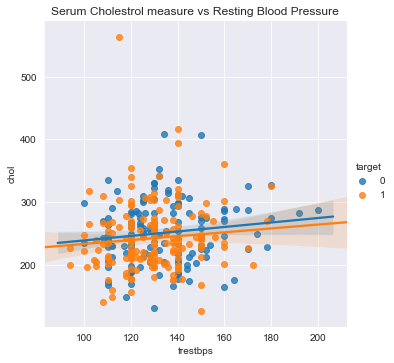

In [14]:
sns.lmplot(x="trestbps", y="chol",data=df,hue='target')
plt.title('Serum Cholestrol measure vs Resting Blood Pressure');

Text(0.5, 1.0, 'Ca values count')

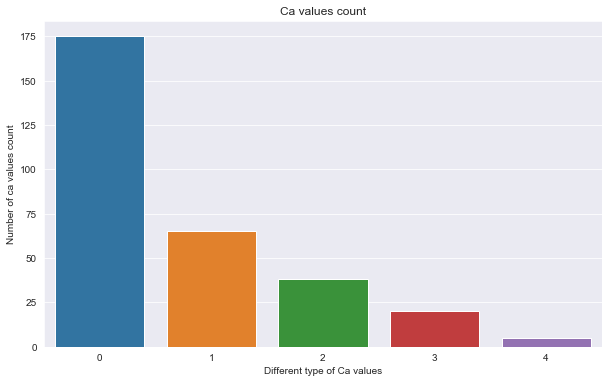

In [15]:
plt.figure(figsize=(10,6))
count= df['ca'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca values count")
plt.xlabel("Different type of Ca values")
plt.title("Ca values count")

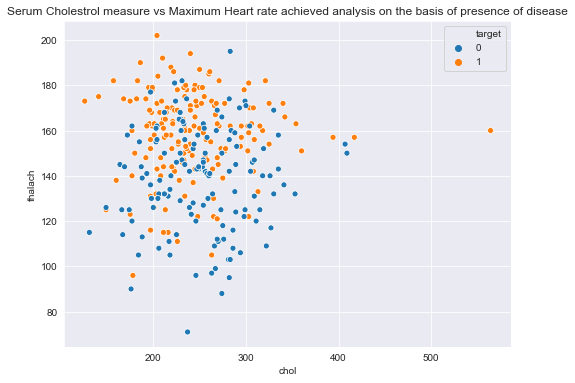

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.title('Serum Cholestrol measure vs Maximum Heart rate achieved analysis on the basis of presence of disease');

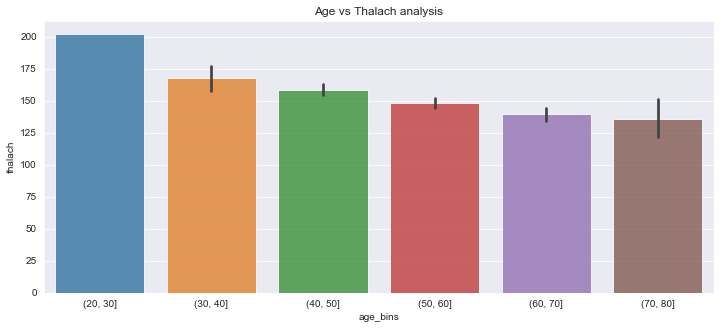

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['age_bins'],y=df['thalach'],data = df,alpha=0.8)
plt.title('Age vs Thalach analysis');

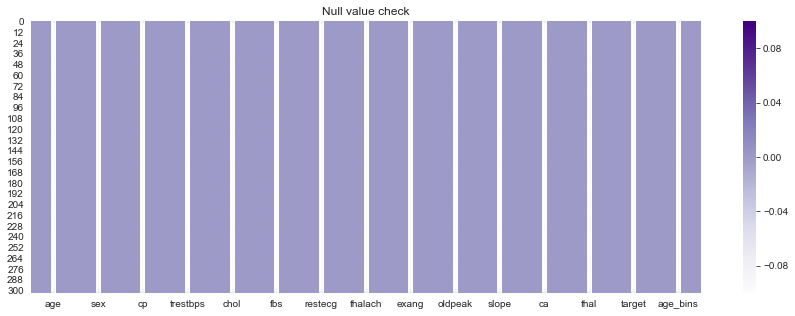

In [18]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(), annot=True, cmap = 'Purples')
plt.title('Null value check');

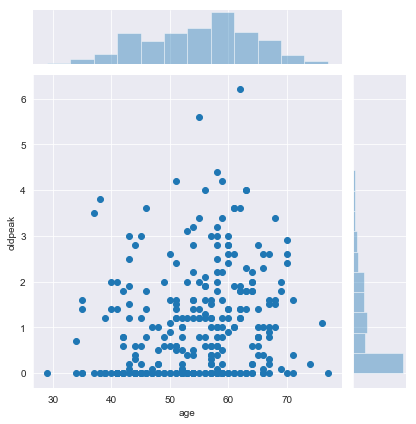

In [20]:
sns.jointplot(x = df['age'], y = df['oldpeak']);

In [21]:
df.drop('age_bins',axis = 1,inplace = True)
y = df['target']

In [22]:
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['ca']=df['ca'].astype('category')
df['thal']=df['thal'].astype('category')
df['target']=df['target'].astype('category')

In [23]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [24]:
X=df.drop('target_1',axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
age          303 non-null int64
trestbps     303 non-null int64
chol         303 non-null int64
thalach      303 non-null int64
oldpeak      303 non-null float64
sex_1        303 non-null uint8
cp_1         303 non-null uint8
cp_2         303 non-null uint8
cp_3         303 non-null uint8
fbs_1        303 non-null uint8
restecg_1    303 non-null uint8
restecg_2    303 non-null uint8
exang_1      303 non-null uint8
slope_1      303 non-null uint8
slope_2      303 non-null uint8
ca_1         303 non-null uint8
ca_2         303 non-null uint8
ca_3         303 non-null uint8
ca_4         303 non-null uint8
thal_1       303 non-null uint8
thal_2       303 non-null uint8
thal_3       303 non-null uint8
dtypes: float64(1), int64(4), uint8(17)
memory usage: 16.9 KB


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.16, random_state = 65)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logmod = LogisticRegression()

In [77]:
logmod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
predictions = logmod.predict(X_test)

In [79]:
predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

log_pred=logmod.predict(X_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test,log_pred))
print('\n')
print('Classification report: ')
print(classification_report(y_test,log_pred))
print('\n')
print('Accuracy score: {}%'.format(round(accuracy_score(y_test,log_pred)*100,2)))

Confusion Matrix: 
[[22  1]
 [ 1 25]]


Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.96      0.96      0.96        26

   micro avg       0.96      0.96      0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



Accuracy score: 95.92%
